In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from matplotlib import pyplot as plt
from matplotlib import cm
import os
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [20]:
#Set step, paths, pfts and run all
#STEP = 1
STEP = 'NPP_VegC_VegN_PFT'
CMT='birch'
#STEP = 4

#STEP1_results = '/data/workflows/BONA-Birch-STEP1-SA/results.csv'
#STEP1_sample_matrix = '/data/workflows/BONA-Birch-STEP1-SA/sample_matrix.csv'

STEP1_results = '/data/workflows/BONA-BS-STEP1-SA/results.csv'
STEP1_sample_matrix = '/data/workflows/BONA-BS-STEP1-SA/sample_matrix.csv'

NPP_VegC_PFT_results = '/data/workflows/BONA-Birch-NPP-VegC-PFT-SA/results.csv'
NPP_VegC_PFT_sample_matrix = '/data/workflows/BONA-Birch-NPP-VegC-PFT-SA/sample_matrix.csv'

#NPP_VegC_PFT_results = '/data/workflows/BONA-BS-NPP-VegC-PFT-SA/results.csv'
#NPP_VegC_PFT_sample_matrix = '/data/workflows/BONA-BS-NPP-VegC-PFT-SA/sample_matrix.csv'


#STEP4_results = '/data/workflows/BONA-Birch-STEP4-SA/results.csv'
#STEP4_sample_matrix = '/data/workflows/BONA-Birch-STEP4-SA/sample_matrix.csv'

STEP4_results = '/data/workflows/BONA-BS-STEP4-SA/results.csv'
STEP4_sample_matrix = '/data/workflows/BONA-BS-STEP4-SA/sample_matrix.csv'

pfts=['White Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen']

In [21]:
#if number of pfts != 5 you will have to adjust these values

if STEP == 1:
    target_vars = ['GPP1', 'GPP2', 'GPP3', 'GPP4', 'GPP5']
    
    calib_params = [['cmax', 'cmax.1', 'cmax.2', 'cmax.3', 'cmax.4']] # here for reference
    
    vars_nopft= ['GPP']
    
if STEP == 'NPP_VegC_PFT' and CMT=='birch':
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
                   'VegCarbonLeaf4', 
                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5']
    
    calib_params = [['nmax'], ['krb(0)'], ['krb(1)'], ['krb(2)'],
                   ['cfall(0)'], ['cfall(1)'], ['cfall(2)'],
                   ['nfall(0)'], ['nfall(1)'], ['nfall(2)']] # here for reference
    calib_params_flat = ['nmax', 'krb(0)', 'krb(1)', 'krb(2)',
                   'cfall(0)', 'cfall(1)', 'cfall(2)',
                    'nfall(0)', 'nfall(1)', 'nfall(2)']
    vars_nopft= ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
if STEP == 'NPP_VegC_VegN_PFT' and CMT=='birch':
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
                   'VegCarbonLeaf4', 
                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 
                   'VegNitrogenLeaf2', 'VegNitrogenStem2', 'VegNitrogenRoot2',
                   'VegNitrogenLeaf3', 'VegNitrogenStem3', 'VegNitrogenRoot3',
                   'VegNitrogenLeaf4', 
                   'VegNitrogenLeaf5', 'VegNitrogenStem5', 'VegNitrogenRoot5']
    
    calib_params = [['nmax'], ['krb(0)'], ['krb(1)'], ['krb(2)'],
                   ['cfall(0)'], ['cfall(1)'], ['cfall(2)'],
                   ['nfall(0)'], ['nfall(1)'], ['nfall(2)']] # here for reference
    calib_params_flat = ['nmax', 'krb(0)', 'krb(1)', 'krb(2)',
                   'cfall(0)', 'cfall(1)', 'cfall(2)',
                    'nfall(0)', 'nfall(1)', 'nfall(2)']
    vars_nopft= ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 
                 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 'NPP_VegC_VegN_PFT' and CMT=='black-spruce':
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
                   'VegCarbonLeaf4', 
                   'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 
                   'VegNitrogenLeaf2', 'VegNitrogenStem2', 'VegNitrogenRoot2',
                   'VegNitrogenLeaf3', 'VegNitrogenStem3', 'VegNitrogenRoot3',
                   'VegNitrogenLeaf4', 
                   'VegNitrogenLeaf5']
    
    calib_params = [['nmax'], ['krb(0)'], ['krb(1)'], ['krb(2)'],
                   ['cfall(0)'], ['cfall(1)'], ['cfall(2)'],
                   ['nfall(0)'], ['nfall(1)'], ['nfall(2)']] # here for reference
    calib_params_flat = ['nmax', 'krb(0)', 'krb(1)', 'krb(2)',
                   'cfall(0)', 'cfall(1)', 'cfall(2)',
                    'nfall(0)', 'nfall(1)', 'nfall(2)']
    vars_nopft= ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 
                 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 2:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5']
    
    calib_params = [# here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1','krb(1).2','krb(1).4'],
                    ['krb(2)','krb(2).1','krb(2).2','krb(2).4']]
    
    vars_nopft  = ['NPPAll']
    
#if STEP == 2:
#    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
#                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
#                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
#                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
#                   'VegCarbonLeaf4', 
#                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5']
    
#    calib_params = [['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
#                    ['krb(1)','krb(1).1','krb(1).2','krb(1).4'],
#                    ['krb(2)','krb(2).1','krb(2).2','krb(2).4'],
#                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
#                    ['cfall(1)','cfall(1).1','cfall(1).2','cfall(1).4'],
#                    ['cfall(2)','cfall(2).1','cfall(2).2','cfall(2).4']]
    
#    calib_params_flat = ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4',
#                    'krb(1)','krb(1).1','krb(1).2','krb(1).3',
#                    'krb(2)','krb(2).1','krb(2).2','krb(2).3',
#                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
#                    'cfall(1)','cfall(1).1','cfall(1).2','cfall(1).3',
#                    'cfall(2)','cfall(2).1','cfall(2).2','cfall(2).3']
    
#    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
#if STEP == 2:
#    target_vars = ['VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
#                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
#                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
#                   'VegCarbonLeaf4', 
#                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5',
#                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 
#                   'VegNitrogenLeaf2', 'VegNitrogenStem2', 'VegNitrogenRoot2',
#                   'VegNitrogenLeaf3', 'VegNitrogenStem3', 'VegNitrogenRoot3',
#                   'VegNitrogenLeaf4', 
#                   'VegNitrogenLeaf5', 'VegNitrogenStem5', 'VegNitrogenRoot5']
    
#    calib_params = [['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
#                    ['cfall(1)','cfall(1).1','cfall(1).2','cfall(1).4'],
#                    ['cfall(2)','cfall(2).1','cfall(2).2','cfall(2).4'],
#                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
#                    ['nfall(1)','nfall(1).1','nfall(1).2','nfall(1).4'],
#                    ['nfall(2)','nfall(2).1','nfall(2).2','nfall(2).4']]
    
#    calib_params_flat = ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
#                    'cfall(1)','cfall(1).1','cfall(1).2','cfall(1).3',
#                    'cfall(2)','cfall(2).1','cfall(2).2','cfall(2).3',
#                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
#                    'nfall(1)','nfall(1).1','nfall(1).2','nfall(1).3',
#                    'nfall(2)','nfall(2).1','nfall(2).2','nfall(2).3']
    
#    vars_nopft  = ['VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 
#                   'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
#if STEP == 2:
#    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
#                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
#                   'VegCarbonStem1', 'VegCarbonRoot3', 'VegCarbonLeaf4',
#                   'VegCarbonRoot4', 'VegCarbonLeaf5']
#    
#    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
#                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
#                    ['krb(1)','krb(1).1'],
#                    ['krb(2)','krb(2).1','krb(2).2']]
#    
#    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
if STEP == 3:
    target_vars = [
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=[
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','sudocfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']
    
if STEP == 3:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1'],
                    ['krb(2)','krb(2).1','krb(2).2'],
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4', # here for reference
                    'krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4',
                    'krb(1)','krb(1).1',
                    'krb(2)','krb(2).1','krb(2).2',
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','cfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']
    
    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 4:
    target_vars = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']
    
    calib_params = [['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']] # here for reference
    calib_params_flat = ['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
    vars_nopft= ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']


In [22]:
def Filter(string_list, substr):
    """ filters list of strings for items containing substring """
    return [str for str in string_list if
             any(sub in str for sub in substr)]

In [23]:
def calc_rmse(x,y):
    """ Return rmse where x and y are array-like """
    return ((x-y) ** 2).mean() ** .5

In [24]:
def calc_overall_accuracy(results, sample_matrix, target_vars, vars_nopft):
    
    results = pd.read_csv(results, names=target_vars)
    #print(results)
    # extract targets from last row of results csv
    targets = results.iloc[int(len(results)-1)] 
    results = results.iloc[0:len(results)-1]
    
    r2s = []
    rmses=[]
    
    #calculate r2s and rmse for individual variables 
    for index, row in results.iterrows():
        
        tgt_r2s = []
        tgt_rmses = []
        
        for var_nopft in vars_nopft:
            
            results_vars_cols = Filter(results, [var_nopft])
            if row[results_vars_cols].isna().values.any():
                tgt_r2s.append(0)
                tgt_rmses.append(10000000)
                continue
            tgt_r2s.append(r2_score(targets[results_vars_cols], row[results_vars_cols]))
            tgt_rmses.append(calc_rmse(targets[results_vars_cols], row[results_vars_cols]))  
            
        #r2s.append(tgt_r2s)
        #rmses.append(tgt_rmses)
        r2s.append(r2_score(targets[results_vars_cols], row[results_vars_cols]))
        rmses.append(calc_rmse(targets[results_vars_cols], row[results_vars_cols]))

    # concatenate sample matrix to results
    sample_matrix = pd.read_csv(sample_matrix)
    results[sample_matrix.columns] = sample_matrix
    r2s=np.array(r2s)
    rmses=np.array(rmses)
    results['r2']= r2s
    results['rmse']= rmses
    #iterate over target variables (no pft or compartment)
    #for idx, name in enumerate(vars_nopft):
        
        #set r2 and rmse columns
    #    results[name + '_r2_raw'] = r2s[:, idx]
    #    results[name + '_rmse_raw'] = rmses[:, idx]
        
    #    #scale rmse between min and max
    #    results[name + '_rmse_scaled'] = (results[name + '_rmse_raw']-np.nanmin(results[name + '_rmse_raw']))/(np.max(results[name + '_rmse_raw'])-np.nanmin(results[name + '_rmse_raw']))
        
    #    #subrtact scaled rmse from r2 for overall accuracy term
    #    results[name + '_accuracy'] = (results[name + '_r2_raw']-results[name+'_rmse_scaled'])
    
    #scale r2 and rmse and combine for overall accuracy term
    results['rmse_scaled'] = (results['rmse']-np.nanmin(results['rmse']))/(np.max(results['rmse'])-np.nanmin(results['rmse']))
    results['overall_accuracy'] = (results['r2']-results['rmse_scaled'])
    results['mean_rmse'] = results[Filter(list(results.columns), ['rmse'])].mean(axis=1)
    results['mean_r2'] = results[Filter(list(results.columns), ['r2'])].mean(axis=1)
    
    return results, targets

In [25]:
if STEP == 1:
    results, targets = calc_overall_accuracy(STEP1_results, STEP1_sample_matrix, target_vars, vars_nopft)
    
if STEP == 'NPP_VegC_PFT':
    results, targets = calc_overall_accuracy(NPP_VegC_PFT_results, NPP_VegC_PFT_sample_matrix, target_vars, vars_nopft)
    
if STEP == 'NPP_VegC_VegN_PFT':
    results, targets = calc_overall_accuracy(NPP_VegC_PFT_results, NPP_VegC_PFT_sample_matrix, target_vars, vars_nopft)
    
if STEP == 2:
    results, targets = calc_overall_accuracy(STEP2_results, STEP2_sample_matrix, target_vars, vars_nopft)
    
if STEP == 3:
    results, targets = calc_overall_accuracy(STEP3_results, STEP3_sample_matrix, target_vars, vars_nopft)

if STEP == 4:
    results, targets = calc_overall_accuracy(STEP4_results, STEP4_sample_matrix, target_vars, vars_nopft)

print('{} runs'.format(len(results)))


100 runs


In [110]:
results

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
0,3041.317106,11000.503785,7360.452346,1021.566734,0.625263,1.681581,0.769190,0.595588,0.003691,0.000570,NaN,2.784737,0.782629,NaN,1.783683,NaN
1,3030.509244,4091.468717,5488.232405,562.307970,0.770848,0.840573,0.732540,0.623947,0.008796,0.000679,NaN,2.639152,0.717226,NaN,1.678189,NaN
2,3115.013671,10927.763533,14212.739494,1326.479811,0.209036,1.975555,0.756831,0.428102,0.005413,0.000212,NaN,3.200964,0.969617,NaN,2.085290,NaN
3,3040.895329,3859.771959,6824.496434,633.170183,0.501984,0.858772,0.797301,0.517929,0.011705,0.000505,NaN,2.908016,0.838012,NaN,1.873014,NaN
4,3116.678169,9729.174502,17061.848212,1509.220550,0.199512,2.345991,0.750264,0.573071,0.006910,0.000156,NaN,3.210488,0.973896,NaN,2.092192,NaN
5,3142.058330,8512.157799,17704.699003,1519.382440,0.193736,2.150621,0.728077,0.407295,0.008746,0.000142,NaN,3.216264,0.976491,NaN,2.096378,NaN
6,3110.404659,12886.356516,33100.902061,2184.274209,0.141405,2.739238,0.795393,0.674459,0.005442,0.000012,NaN,3.268595,1.000000,NaN,2.134297,NaN
7,3047.827553,3141.967759,5676.991727,884.864978,0.507258,2.706460,0.742818,0.689996,0.012563,0.000682,NaN,2.902742,0.835643,NaN,1.869192,NaN
8,3067.466441,11790.359363,17739.798104,1601.935991,0.380338,0.995012,0.738510,0.655341,0.004803,0.000136,NaN,3.029662,0.892661,NaN,1.961161,NaN
9,3091.799649,9597.914557,23381.568274,1949.163206,0.209579,1.703363,0.793615,0.608809,0.007841,0.000078,NaN,3.200421,0.969373,NaN,2.084897,NaN


In [26]:
#get indices of top 15 performing parameter sets
perf = np.argsort(results['overall_accuracy'])[::-1]
#perf = np.argsort(results['mean_rmse'])[::-1]
top = perf[:50].values.tolist()
first = perf[:1].values.tolist()

In [27]:
perf

99    55
98    99
97    54
96     8
95    12
      ..
4     83
3     13
2     46
1      5
0     86
Name: overall_accuracy, Length: 100, dtype: int64

(0.0, 1.0)

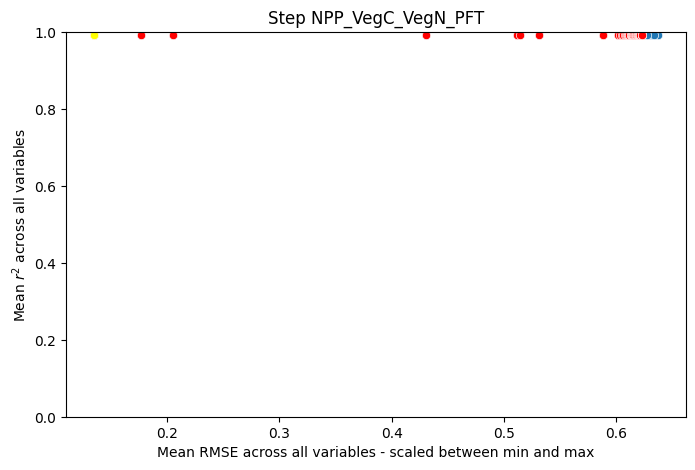

In [28]:
fig, ax = plt.subplots(figsize = (8,5))

sns.scatterplot(data = results, x='mean_rmse', y='mean_r2')
sns.scatterplot(data = results.iloc[top], x='mean_rmse', y='mean_r2', color='red')
sns.scatterplot(data = results.iloc[first], x='mean_rmse', y='mean_r2', color='yellow')

ax.title.set_text('Step {}'.format(STEP))
ax.set_ylabel('Mean $r^2$ across all variables')
ax.set_xlabel('Mean RMSE across all variables - scaled between min and max')
plt.ylim(0,1)
#plt.xlim(0,1)

In [88]:
results.columns

Index(['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum',
       'AvailableNitrogenSum', 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr',
       'kdcsomcr', 'r2', 'rmse', 'rmse_scaled', 'overall_accuracy',
       'mean_rmse', 'mean_r2'],
      dtype='object')

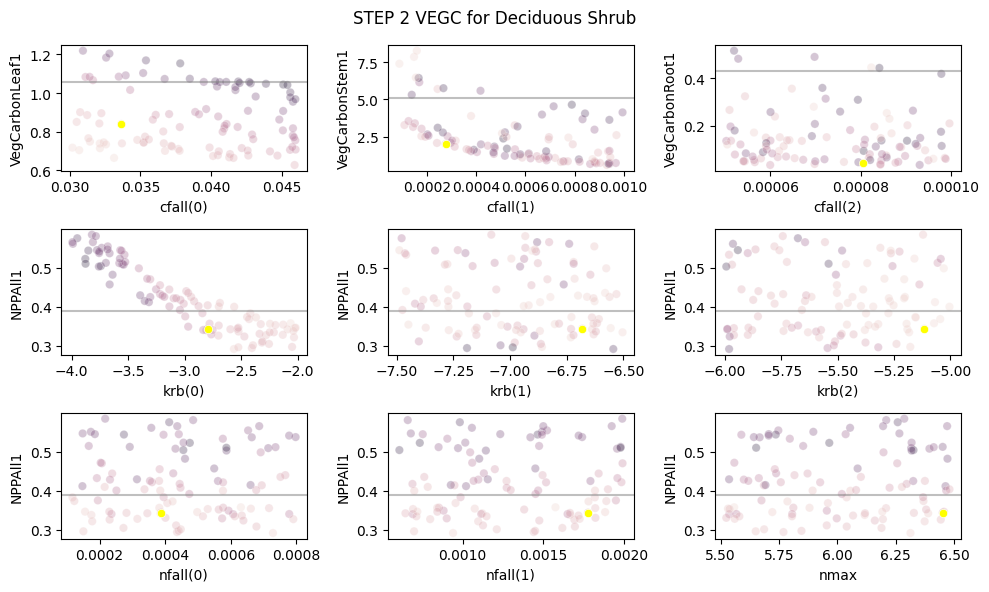

In [31]:
if STEP == 'NPP_VegC_PFT' or STEP=='NPP_VegC_VegN_PFT':
    pft=1
    fig, axes = plt.subplots(3,3, figsize = (10,6))
    fig.suptitle('STEP 2 VEGC for Deciduous Shrub')

    axes[0,0].axhline(targets[f'VegCarbonLeaf{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y=f'VegCarbonLeaf{pft}', ax=axes[0,0], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(0)', y=f'VegCarbonLeaf{pft}', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y=f'VegCarbonLeaf{pft}', ax=axes[0,0], color='yellow',legend=False)

    axes[0,1].axhline(targets[f'VegCarbonStem{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1)', y=f'VegCarbonStem{pft}', ax=axes[0,1], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(1)', y=f'VegCarbonStem{pft}', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1)', y=f'VegCarbonStem{pft}', ax=axes[0,1], color='yellow',legend=False)

    axes[0,2].axhline(targets[f'VegCarbonRoot{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2)', y=f'VegCarbonRoot{pft}', ax=axes[0,2], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(2)', y=f'VegCarbonRoot{pft}', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(2)', y=f'VegCarbonRoot{pft}', ax=axes[0,2], color='yellow',legend=False)
    
    axes[1,0].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], color='yellow',legend=False)
    
    axes[1,1].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], alpha=0.3,legend=False, hue=f'VegCarbonStem{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], color='yellow',legend=False)
    
    axes[1,2].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], alpha=0.3,legend=False, hue=f'VegCarbonRoot{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], color='yellow',legend=False)
    
    axes[2,0].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0)', y=f'NPPAll{pft}', ax=axes[2,0], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(0)', y=f'NPPAll{pft}', ax=axes[2,0], color='yellow',legend=False)
    
    axes[2,1].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(1)', y=f'NPPAll{pft}', ax=axes[2,1], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(1)', y=f'NPPAll{pft}', ax=axes[2,1], color='yellow',legend=False)
    
    axes[2,2].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax', y=f'NPPAll{pft}', ax=axes[2,2], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax', y=f'NPPAll{pft}', ax=axes[2,2], color='yellow',legend=False)

    fig.tight_layout()

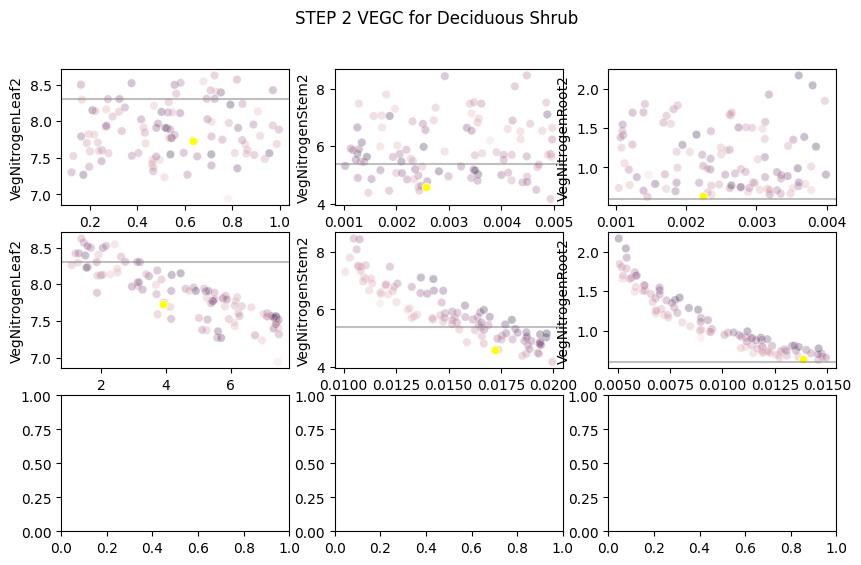

In [738]:
if 'NPP_VegC_VegN_PFT':
    pft=2
    fig, axes = plt.subplots(3,3, figsize = (10,6))
    fig.suptitle('STEP 2 VEGC for Deciduous Shrub')

    axes[0,0].axhline(targets[f'VegNitrogenLeaf{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], color='yellow',legend=False)

    axes[0,1].axhline(targets[f'VegNitrogenStem{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], color='yellow',legend=False)

    axes[0,2].axhline(targets[f'VegNitrogenRoot{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], color='yellow',legend=False)
    
    axes[1,0].axhline(targets[f'VegNitrogenLeaf{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[1,0], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[1,0], color='yellow',legend=False)

    axes[1,1].axhline(targets[f'VegNitrogenStem{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[1,1], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[1,1], color='yellow',legend=False)

    axes[1,2].axhline(targets[f'VegNitrogenRoot{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[1,2], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[1,2], color='yellow',legend=False)
    

In [739]:
results.iloc[top][[f'VegCarbonLeaf{pft}', f'VegCarbonStem{pft}', f'VegCarbonRoot{pft}', f'NPPAll{pft}']]
#results.iloc[top][[f'VegCarbonLeaf{pft}', f'NPPAll{pft}']]

,VegCarbonLeaf2,VegCarbonStem2,VegCarbonRoot2,NPPAll2
91,148.308952,177.307401,23.472389,40.443553
90,172.810039,256.235132,33.451682,42.864097
61,165.217952,214.728688,26.875164,47.773369
2,163.784668,211.020668,8.515752,38.793031
38,167.826637,210.114282,28.241046,37.706640
47,160.500966,187.784866,23.015646,41.126075
46,150.790059,336.138815,13.752282,44.704097
5,156.200648,216.477585,10.273577,36.668641
68,143.421260,199.345166,11.168165,46.304085
85,142.032500,231.537865,9.514078,36.162940


In [740]:
targets[[f'VegCarbonLeaf{pft}', f'VegCarbonStem{pft}', f'VegCarbonRoot{pft}', f'NPPAll{pft}']]
#targets[[f'VegCarbonLeaf{pft}', f'NPPAll{pft}']]

VegCarbonLeaf2    173.92000
VegCarbonStem2    217.67000
VegCarbonRoot2     30.54402
NPPAll2            39.68000
Name: 100, dtype: float64

In [744]:
results.iloc[38][calib_params_flat]

nmax        2.471715
krb(0)     -8.904972
krb(1)     -4.022941
krb(2)     -3.735146
cfall(0)    0.000053
cfall(1)    0.013252
cfall(2)    0.012735
nfall(0)    0.000002
nfall(1)    0.004879
nfall(2)    0.002361
Name: 38, dtype: float64

Text(0, 0.5, 'Value')

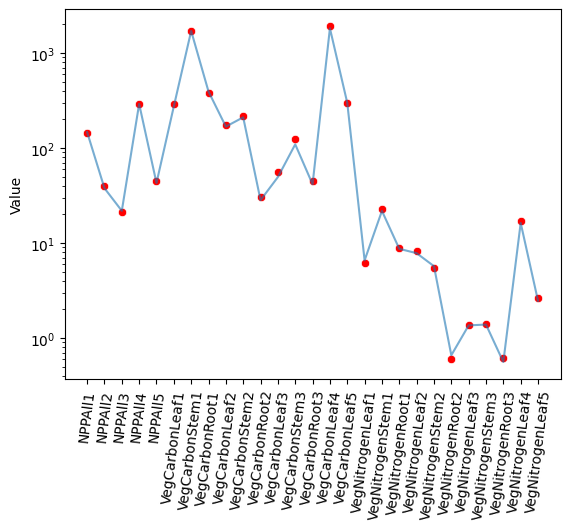

In [743]:
#sns.lineplot(results[target_vars].T, legend=False, alpha=0.6)
sns.lineplot(results[target_vars].iloc[38].T, legend=False, alpha=0.6)
sns.scatterplot(targets.T, color='red')
plt.xticks(rotation=83)
plt.yscale('log')
plt.ylabel('Value')

In [68]:
#
#print(results[['VegVarbonStem1']] + results[['VegVarbonStem3']])

KeyError: "None of [Index(['VegVarbonStem1'], dtype='object')] are in the [columns]"

In [115]:
results

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
0,3041.317106,11000.503785,7360.452346,1021.566734,0.625263,1.681581,0.769190,0.595588,0.003691,0.000570,NaN,2.784737,0.782629,NaN,1.783683,NaN
1,3030.509244,4091.468717,5488.232405,562.307970,0.770848,0.840573,0.732540,0.623947,0.008796,0.000679,NaN,2.639152,0.717226,NaN,1.678189,NaN
2,3115.013671,10927.763533,14212.739494,1326.479811,0.209036,1.975555,0.756831,0.428102,0.005413,0.000212,NaN,3.200964,0.969617,NaN,2.085290,NaN
3,3040.895329,3859.771959,6824.496434,633.170183,0.501984,0.858772,0.797301,0.517929,0.011705,0.000505,NaN,2.908016,0.838012,NaN,1.873014,NaN
4,3116.678169,9729.174502,17061.848212,1509.220550,0.199512,2.345991,0.750264,0.573071,0.006910,0.000156,NaN,3.210488,0.973896,NaN,2.092192,NaN
5,3142.058330,8512.157799,17704.699003,1519.382440,0.193736,2.150621,0.728077,0.407295,0.008746,0.000142,NaN,3.216264,0.976491,NaN,2.096378,NaN
6,3110.404659,12886.356516,33100.902061,2184.274209,0.141405,2.739238,0.795393,0.674459,0.005442,0.000012,NaN,3.268595,1.000000,NaN,2.134297,NaN
7,3047.827553,3141.967759,5676.991727,884.864978,0.507258,2.706460,0.742818,0.689996,0.012563,0.000682,NaN,2.902742,0.835643,NaN,1.869192,NaN
8,3067.466441,11790.359363,17739.798104,1601.935991,0.380338,0.995012,0.738510,0.655341,0.004803,0.000136,NaN,3.029662,0.892661,NaN,1.961161,NaN
9,3091.799649,9597.914557,23381.568274,1949.163206,0.209579,1.703363,0.793615,0.608809,0.007841,0.000078,NaN,3.200421,0.969373,NaN,2.084897,NaN


Text(0, 0.5, 'Value')

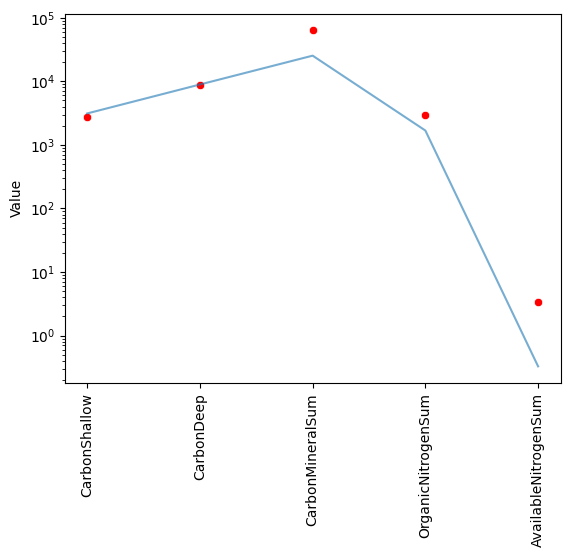

In [117]:
#sns.lineplot(results[target_vars].T, legend=False, alpha=0.6)
sns.lineplot(results[target_vars].iloc[32].T, legend=False, alpha=0.6)
sns.scatterplot(targets.T, color='red')
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel('Value')

<AxesSubplot:xlabel='kdcsompr', ylabel='CarbonMineralSum'>

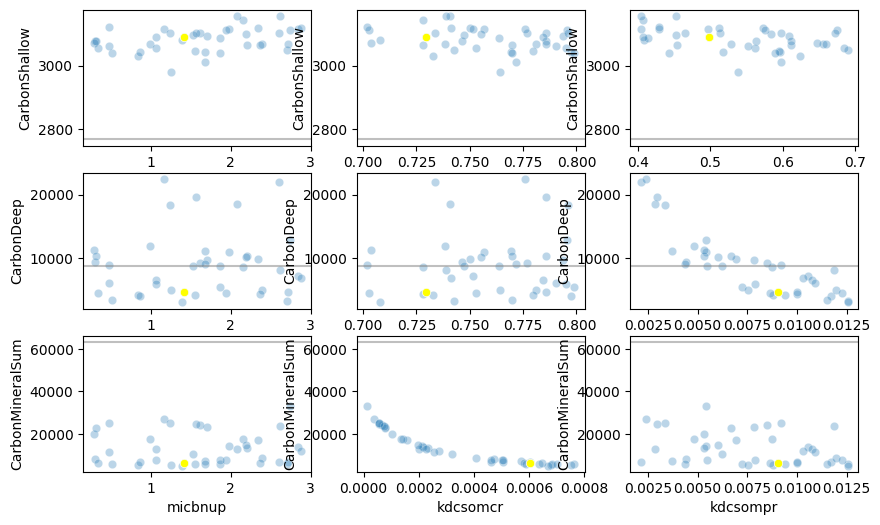

In [114]:
fig, axes = plt.subplots(3,3, figsize = (10,6))

axes[0,0].axhline(targets['CarbonShallow'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='micbnup', y='CarbonShallow', ax=axes[0,0], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='micbnup', y='CarbonShallow', ax=axes[0,0], color='yellow',legend=False)

axes[0,1].axhline(targets['CarbonShallow'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcrawc', y='CarbonShallow', ax=axes[0,1], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcrawc', y='CarbonShallow', ax=axes[0,1], color='yellow',legend=False)

axes[0,2].axhline(targets['CarbonShallow'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsoma', y='CarbonShallow', ax=axes[0,2], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsoma', y='CarbonShallow', ax=axes[0,2], color='yellow',legend=False)


axes[1,0].axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='micbnup', y='CarbonDeep', ax=axes[1,0], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='micbnup', y='CarbonDeep', ax=axes[1,0], color='yellow',legend=False)

axes[1,1].axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcrawc', y='CarbonDeep', ax=axes[1,1], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcrawc', y='CarbonDeep', ax=axes[1,1], color='yellow',legend=False)

axes[1,2].axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsompr', y='CarbonDeep', ax=axes[1,2], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsompr', y='CarbonDeep', ax=axes[1,2], color='yellow',legend=False)

axes[2,0].axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='micbnup', y='CarbonMineralSum', ax=axes[2,0], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='micbnup', y='CarbonMineralSum', ax=axes[2,0], color='yellow',legend=False)

axes[2,1].axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsomcr', y='CarbonMineralSum', ax=axes[2,1], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsomcr', y='CarbonMineralSum', ax=axes[2,1], color='yellow',legend=False)

axes[2,2].axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsompr', y='CarbonMineralSum', ax=axes[2,2], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsompr', y='CarbonMineralSum', ax=axes[2,2], color='yellow',legend=False)


In [116]:
targets

CarbonShallow            2768.09
CarbonDeep               8765.64
CarbonMineralSum        63294.00
OrganicNitrogenSum       2981.04
AvailableNitrogenSum        3.41
Name: 42, dtype: float64

In [19]:
728.60+2307.00

3035.6

In [30]:
results[results['CarbonShallow']+results['CarbonDeep']<3300][['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum
1,588.049282,2331.436032,12036.823260,1006.984134,0.534431
2,606.623621,2660.584011,17979.831469,1136.814002,0.878088
3,682.664135,2444.077868,11906.004734,932.521367,0.539528
4,659.980477,2478.352163,11991.431627,843.061164,1.105318
5,608.241192,2463.984400,12821.521622,907.461691,1.080573
...,...,...,...,...,...
143,572.681624,2434.443274,12043.186356,803.422079,1.161220
144,659.636213,2591.355834,15074.967238,1102.713210,0.526310
145,587.123034,2461.204266,14239.975067,1084.969275,0.525067
147,678.873655,2521.906650,14199.401336,1063.115701,0.793717


In [36]:
results.loc[np.abs((results['CarbonShallow']+results['CarbonDeep'])-3035.6)<300, target_vars].sort_values(by='CarbonMineralSum', ascending=False)

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum
102,644.447488,2665.952886,18223.382689,1180.081822,0.691715
8,613.024786,2673.786716,18121.344759,1138.990199,0.831569
59,606.776028,2598.739009,18011.072621,1229.249019,0.496791
2,606.623621,2660.584011,17979.831469,1136.814002,0.878088
24,673.721447,2646.257338,17938.583618,1209.614032,0.677683
...,...,...,...,...,...
116,578.042649,2305.700858,11243.220186,880.277946,0.527598
142,614.249879,2308.643163,11150.772409,871.911563,0.709895
91,740.114325,2378.173533,11137.859249,948.801667,0.522348
60,596.379361,2258.958444,11066.382405,961.304807,0.516441


In [118]:
results.iloc[32][calib_params_flat]

micbnup     0.472101
kdcrawc     0.701822
kdcsoma     0.428333
kdcsompr    0.009196
kdcsomcr    0.000057
Name: 32, dtype: float64

In [ ]:
if STEP == 'NPP_VegC_PFT':
    fig, ax=plt.subplots()
    ax.axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(2)', y='NPPAll3', ax=ax, alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(2)', y='NPPAll3', ax=ax, color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(2)', y='NPPAll3', ax=ax, color='yellow',legend=False)
    ax.title.set_text('EvrTree')

/tmp/ipykernel_341/787641772.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = results, x='cmax.3', y='GPP4', ax=axes[1,0], alpha=0.05, palette=palette)


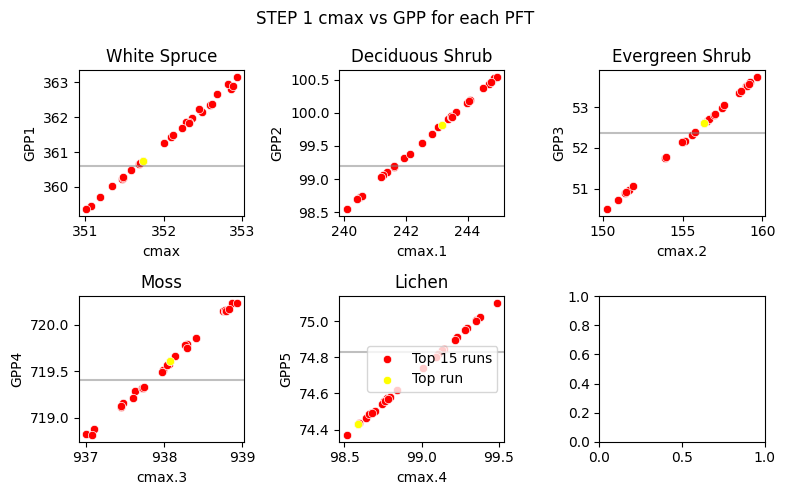

In [421]:
palette = sns.color_palette("mako", as_cmap=True)

if STEP == 1:
    fig, axes = plt.subplots(2,3, figsize = (8,5))
    fig.suptitle('STEP 1 cmax vs GPP for each PFT')

    axes[0,0].axhline(targets['GPP1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax', y='GPP1', ax=axes[0,0], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax', y='GPP1', ax=axes[0,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax', y='GPP1', ax=axes[0,0], color='yellow', legend=False)
    axes[0,0].title.set_text(pfts[0])

    axes[0,1].axhline(targets['GPP2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.1', y='GPP2', ax=axes[0,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.1', y='GPP2', ax=axes[0,1], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.1', y='GPP2', ax=axes[0,1], color='yellow', legend=False)
    axes[0,1].title.set_text(pfts[1])

    axes[0,2].axhline(targets['GPP3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.2', y='GPP3', ax=axes[0,2], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.2', y='GPP3', ax=axes[0,2], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.2', y='GPP3', ax=axes[0,2], color='yellow', legend=False)
    axes[0,2].title.set_text(pfts[2])

    axes[1,0].axhline(targets['GPP4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.3', y='GPP4', ax=axes[1,0], alpha=0.05, palette=palette)
    sns.scatterplot(data = results.iloc[top], x='cmax.3', y='GPP4', ax=axes[1,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.3', y='GPP4', ax=axes[1,0], color='yellow', legend=False)
    axes[1,0].title.set_text(pfts[3])

    axes[1,1].axhline(targets['GPP5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.4', y='GPP5', ax=axes[1,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.4', y='GPP5', ax=axes[1,1], color='red', label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='cmax.4', y='GPP5', ax=axes[1,1], color='yellow', label='Top run')
    axes[1,1].title.set_text(pfts[4])

    #axes[1,1].legend(loc='lower right', bbox_to_anchor=(1,0), title='Overall Accuracy')
   
    fig.tight_layout()


In [422]:
results.iloc[first]

,GPP1,GPP2,GPP3,GPP4,GPP5,cmax,cmax.1,cmax.2,cmax.3,cmax.4,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
4,360.755984,99.820975,52.597994,719.606201,74.428985,351.735566,243.161529,156.335297,938.071549,98.59029,0.999998,0.364107,0.0,0.999998,0.182054,0.999998


In [352]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['NPPAll1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='NPPAll1', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='NPPAll1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='NPPAll1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('EvrTree')

    axes[0,1].axhline(targets['NPPAll2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).1', y='NPPAll2', ax=axes[0,1], hue='krb(0).1', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('DecidShrub')

    axes[0,2].axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='NPPAll3', ax=axes[0,2], hue='krb(0).2', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='NPPAll3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='NPPAll3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('DecidTree')

    axes[1,0].axhline(targets['NPPAll4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='NPPAll4', ax=axes[1,0], hue='krb(0).3', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='NPPAll4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='NPPAll4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('Moss')

    axes[1,1].axhline(targets['NPPAll5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).4', y='NPPAll5', ax=axes[1,1], hue='krb(0).4', legend=True, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='red',label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='yellow',label='Top run')
    axes[1,1].title.set_text('EvrShrub')

    axes[1,1].legend(loc='lower right', bbox_to_anchor=(0,-.5), title='krb(0)')

    fig.tight_layout()


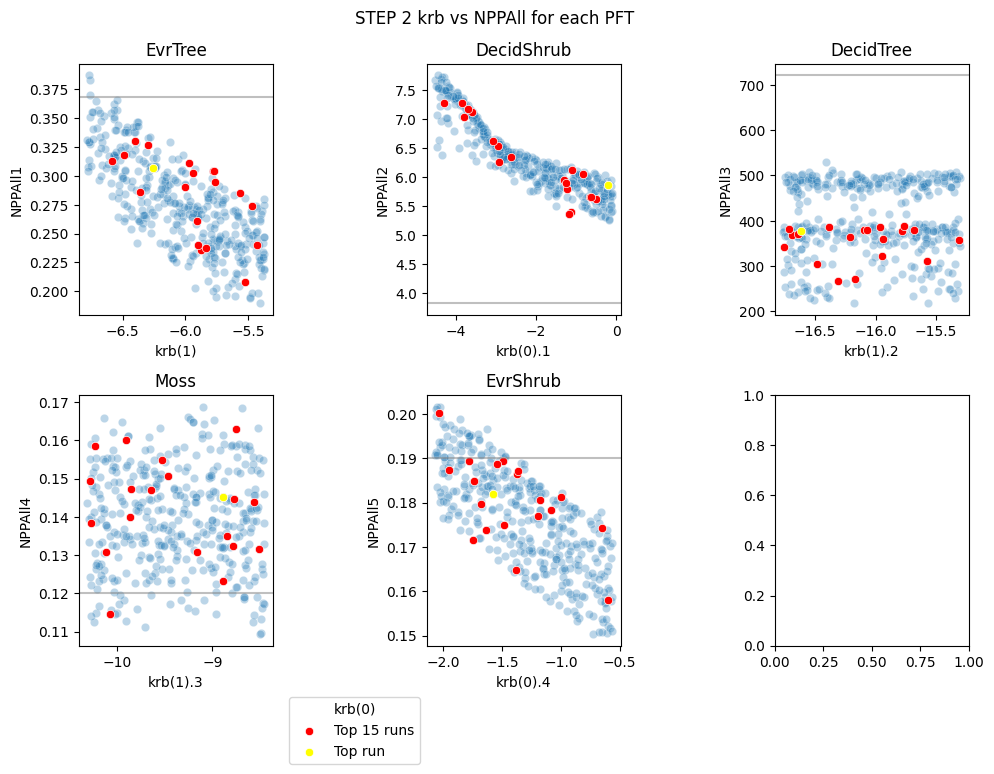

In [299]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 krb vs NPPAll for each PFT')

    axes[0,0].axhline(targets['NPPAll1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(1)', y='NPPAll1', ax=axes[0,0], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(1)', y='NPPAll1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(1)', y='NPPAll1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('EvrTree')

    axes[0,1].axhline(targets['NPPAll2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).1', y='NPPAll2', ax=axes[0,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('DecidShrub')

    axes[0,2].axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(1).2', y='NPPAll3', ax=axes[0,2], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(1).2', y='NPPAll3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(1).2', y='NPPAll3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('DecidTree')

    axes[1,0].axhline(targets['NPPAll4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(1).3', y='NPPAll4', ax=axes[1,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(1).3', y='NPPAll4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(1).3', y='NPPAll4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('Moss')

    axes[1,1].axhline(targets['NPPAll5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).4', y='NPPAll5', ax=axes[1,1], legend=True, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='red',label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='yellow',label='Top run')
    axes[1,1].title.set_text('EvrShrub')

    axes[1,1].legend(loc='lower right', bbox_to_anchor=(0,-.5), title='krb(0)')

    fig.tight_layout()

In [222]:
for i, col in enumerate(results.columns):
    print('{}: {}'.format(col, results.iloc[first].values[0][i]))
    
results.iloc[first].values

NPPAll1: 0.3070083733822685
NPPAll2: 5.864494870129397
NPPAll3: 377.5606674302597
NPPAll4: 0.1451680676575051
NPPAll5: 0.181971509888529
VegCarbonLeaf1: 1.5532637238502502
VegCarbonStem1: 18.584281349182127
VegCarbonRoot1: 0.1237774364650249
VegCarbonLeaf2: 1.2320010781288149
VegCarbonStem2: 7.529278621000554e-16
VegCarbonRoot2: 0.0029909177450463
VegCarbonLeaf3: 208.58856353759765
VegCarbonStem3: 10343.34931640625
VegCarbonRoot3: 1095.593835449219
VegCarbonLeaf4: 1.6723900318145752
VegCarbonLeaf5: 0.2480041041970253
VegCarbonStem5: 0.1832100629806518
VegCarbonRoot5: 0.0093456387519836
krb(0): -8.166117506115512
krb(0).1: -0.2013616481514351
krb(0).2: -19.88793280066932
krb(0).3: -5.2358285492600585
krb(0).4: -1.57792701348386
krb(1): -6.256905165717025
krb(1).1: -5.08363298004539
krb(1).2: -16.61485688866246
krb(1).3: -8.883415731422975
krb(2): -3.5611304640625794
krb(2).1: -5.69478036504069
krb(2).2: -14.411997440550556
krb(2).3: -18.1716068007346
cfall(0): 0.013055357848038
cfall(0)

array([[ 3.07008373e-01,  5.86449487e+00,  3.77560667e+02,
         1.45168068e-01,  1.81971510e-01,  1.55326372e+00,
         1.85842813e+01,  1.23777436e-01,  1.23200108e+00,
         7.52927862e-16,  2.99091775e-03,  2.08588564e+02,
         1.03433493e+04,  1.09559384e+03,  1.67239003e+00,
         2.48004104e-01,  1.83210063e-01,  9.34563875e-03,
        -8.16611751e+00, -2.01361648e-01, -1.98879328e+01,
        -5.23582855e+00, -1.57792701e+00, -6.25690517e+00,
        -5.08363298e+00, -1.66148569e+01, -8.88341573e+00,
        -3.56113046e+00, -5.69478037e+00, -1.44119974e+01,
        -1.81716068e+01,  1.30553578e-02,  2.57170838e-01,
         1.69359947e-02,  7.24459263e-03,  5.74144136e-02,
         2.49950996e-04,  5.26930236e-02,  4.62347107e-03,
         1.20917836e-03,  2.70260581e-03,  1.89191058e-03,
         5.56204296e-03,  2.74209701e-03,  9.99995630e-01,
         9.89719708e-01,  0.00000000e+00,  9.99995630e-01,
         4.94859854e-01,  9.99995630e-01]])

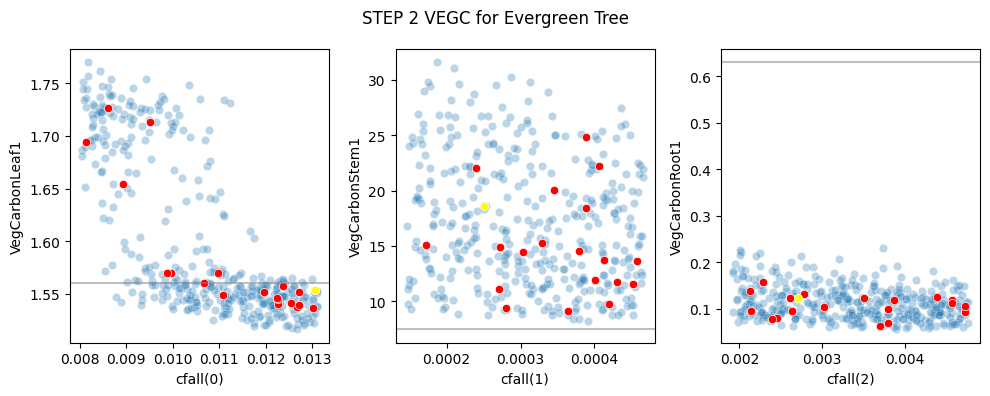

In [223]:
if STEP == 2:
    fig, axes = plt.subplots(1,3, figsize = (10,4))
    fig.suptitle('STEP 2 VEGC for Evergreen Tree')

    axes[0].axhline(targets['VegCarbonLeaf1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0], color='yellow',legend=False)

    axes[1].axhline(targets['VegCarbonStem1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1)', y='VegCarbonStem1', ax=axes[1], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(1)', y='VegCarbonStem1', ax=axes[1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1)', y='VegCarbonStem1', ax=axes[1], color='yellow',legend=False)

    
    axes[2].axhline(targets['VegCarbonRoot1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2)', y='VegCarbonRoot1', ax=axes[2], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(2)', y='VegCarbonRoot1', ax=axes[2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(2)', y='VegCarbonRoot1', ax=axes[2], color='yellow',legend=False)


    fig.tight_layout()


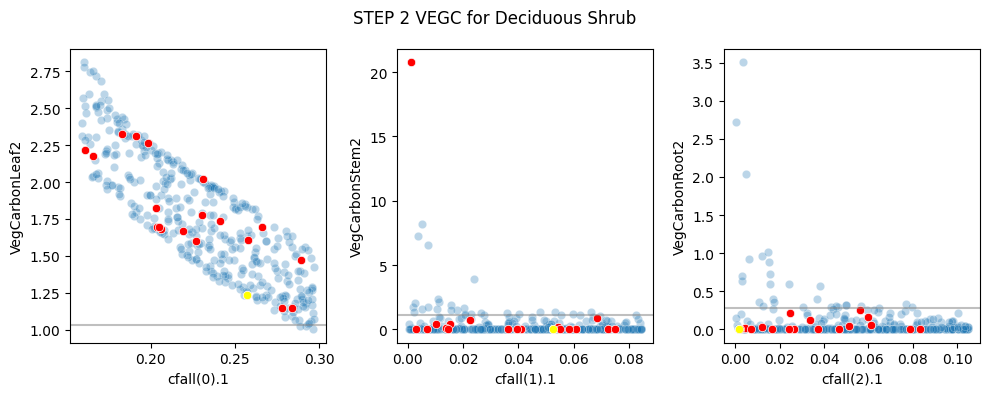

In [224]:
if STEP == 2:
    fig, axes = plt.subplots(1,3, figsize = (10,4))
    fig.suptitle('STEP 2 VEGC for Deciduous Shrub')

    axes[0].axhline(targets['VegCarbonLeaf2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0], color='yellow',legend=False)

    axes[1].axhline(targets['VegCarbonStem2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1).1', y='VegCarbonStem2', ax=axes[1], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(1).1', y='VegCarbonStem2', ax=axes[1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1).1', y='VegCarbonStem2', ax=axes[1], color='yellow',legend=False)

    
    axes[2].axhline(targets['VegCarbonRoot2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2).1', y='VegCarbonRoot2', ax=axes[2], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(2).1', y='VegCarbonRoot2', ax=axes[2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(2).1', y='VegCarbonRoot2', ax=axes[2], color='yellow',legend=False)


    fig.tight_layout()


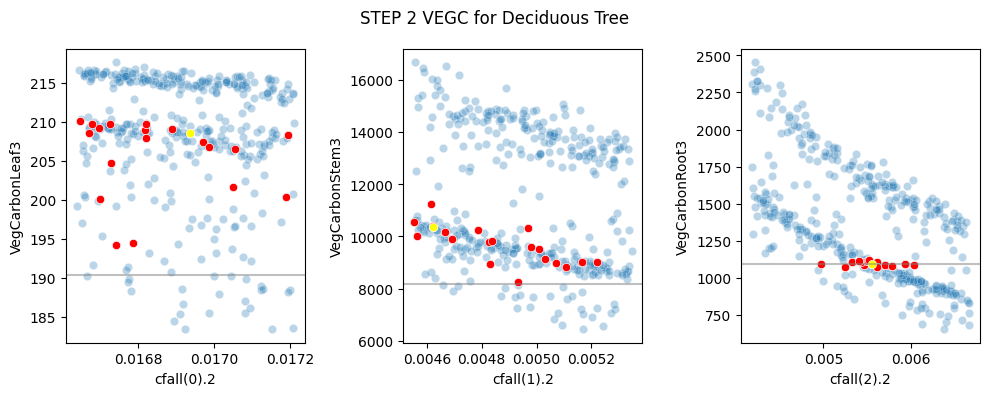

In [225]:
if STEP == 2:
    fig, axes = plt.subplots(1,3, figsize = (10,4))
    fig.suptitle('STEP 2 VEGC for Deciduous Tree')

    axes[0].axhline(targets['VegCarbonLeaf3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0], color='yellow',legend=False)

    axes[1].axhline(targets['VegCarbonStem3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1).2', y='VegCarbonStem3', ax=axes[1], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(1).2', y='VegCarbonStem3', ax=axes[1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1).2', y='VegCarbonStem3', ax=axes[1], color='yellow',legend=False)

    
    axes[2].axhline(targets['VegCarbonRoot3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2).2', y='VegCarbonRoot3', ax=axes[2], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(2).2', y='VegCarbonRoot3', ax=axes[2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(2).2', y='VegCarbonRoot3', ax=axes[2], color='yellow',legend=False)


    fig.tight_layout()

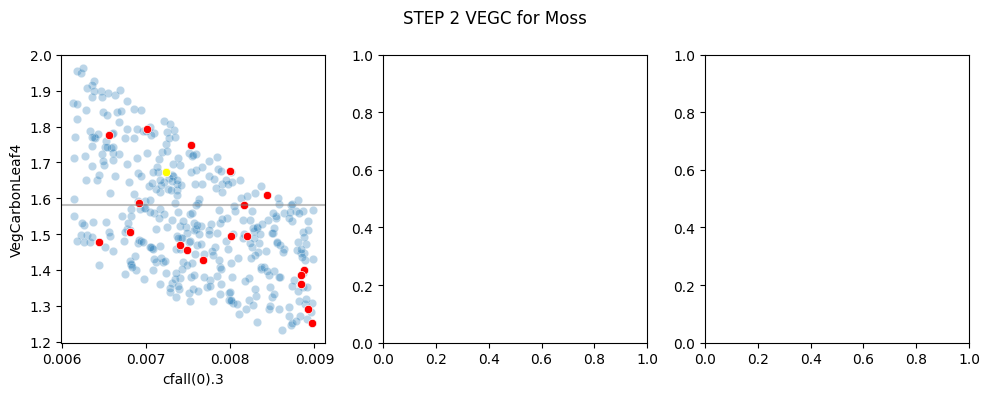

In [226]:
if STEP == 2:
    fig, axes = plt.subplots(1,3, figsize = (10,4))
    fig.suptitle('STEP 2 VEGC for Moss')

    axes[0].axhline(targets['VegCarbonLeaf4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[0], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[0], color='yellow',legend=False)


    fig.tight_layout()

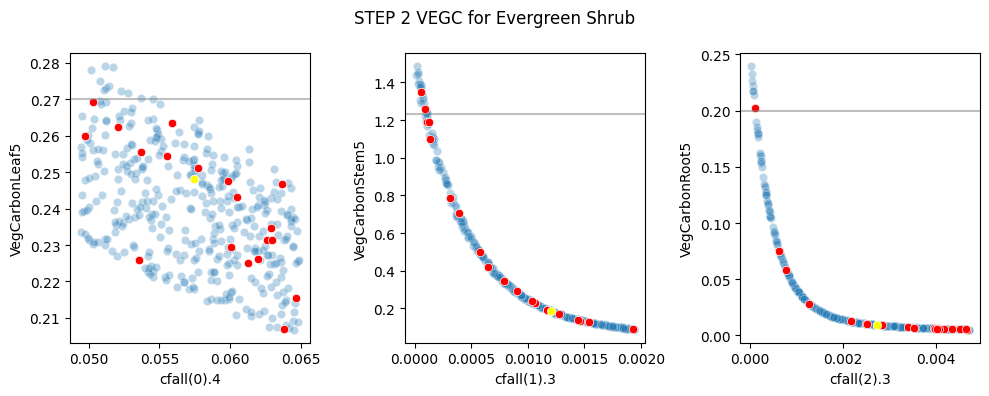

In [227]:
if STEP == 2:
    fig, axes = plt.subplots(1,3, figsize = (10,4))
    fig.suptitle('STEP 2 VEGC for Evergreen Shrub')

    axes[0].axhline(targets['VegCarbonLeaf5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[0], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[0], color='yellow',legend=False)

    axes[1].axhline(targets['VegCarbonStem5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1).3', y='VegCarbonStem5', ax=axes[1], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(1).3', y='VegCarbonStem5', ax=axes[1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1).3', y='VegCarbonStem5', ax=axes[1], color='yellow',legend=False)

    
    axes[2].axhline(targets['VegCarbonRoot5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2).3', y='VegCarbonRoot5', ax=axes[2], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='cfall(2).3', y='VegCarbonRoot5', ax=axes[2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(2).3', y='VegCarbonRoot5', ax=axes[2], color='yellow',legend=False)


    fig.tight_layout()

KeyError: 'VegNitrogenLeaf1'

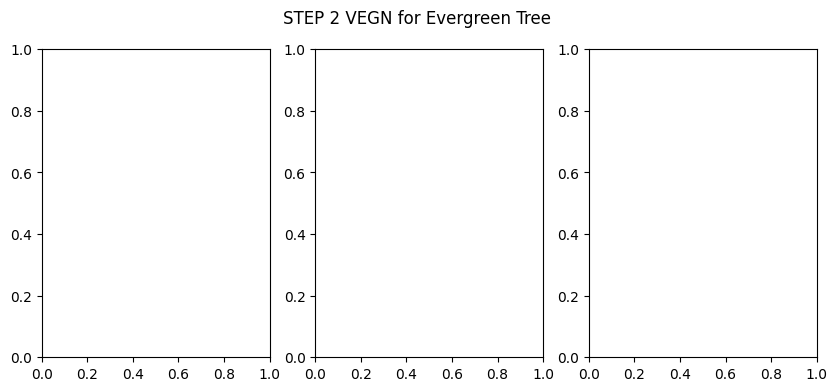

In [103]:
if STEP == 2:
    fig, axes = plt.subplots(1,3, figsize = (10,4))
    fig.suptitle('STEP 2 VEGN for Evergreen Tree')

    axes[0].axhline(targets['VegNitrogenLeaf1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0)', y='VegNitrogenLeaf1', ax=axes[0], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nfall(0)', y='VegNitrogenLeaf1', ax=axes[0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(0)', y='VegNitrogenLeaf1', ax=axes[0], color='yellow',legend=False)

    axes[1].axhline(targets['VegNitrogenStem1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(1)', y='VegNitrogenStem1', ax=axes[1], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nfall(1)', y='VegNitrogenStem1', ax=axes[1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(1)', y='VegNitrogenStem1', ax=axes[1], color='yellow',legend=False)

    
    axes[2].axhline(targets['VegNitrogenRoot1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(2)', y='VegNitrogenRoot1', ax=axes[2], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nfall(2)', y='VegNitrogenRoot1', ax=axes[2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(2)', y='VegNitrogenRoot1', ax=axes[2], color='yellow',legend=False)


    fig.tight_layout()

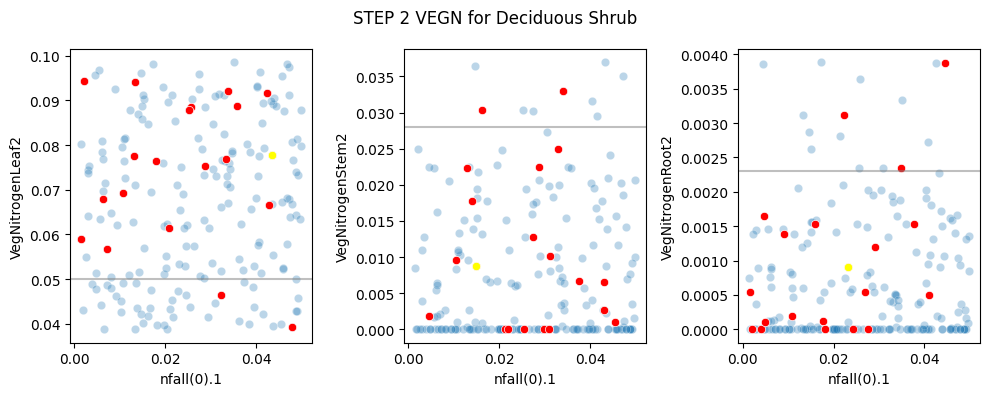

In [199]:
if STEP == 2:
    fig, axes = plt.subplots(1,3, figsize = (10,4))
    fig.suptitle('STEP 2 VEGN for Deciduous Shrub')

    axes[0].axhline(targets['VegNitrogenLeaf2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0).1', y='VegNitrogenLeaf2', ax=axes[0], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nfall(0).1', y='VegNitrogenLeaf2', ax=axes[0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(0).1', y='VegNitrogenLeaf2', ax=axes[0], color='yellow',legend=False)

    axes[1].axhline(targets['VegNitrogenStem2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0).1', y='VegNitrogenStem2', ax=axes[1], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nfall(1).1', y='VegNitrogenStem2', ax=axes[1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(1).1', y='VegNitrogenStem2', ax=axes[1], color='yellow',legend=False)

    
    axes[2].axhline(targets['VegNitrogenRoot2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0).1', y='VegNitrogenRoot2', ax=axes[2], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nfall(2).1', y='VegNitrogenRoot2', ax=axes[2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(2).1', y='VegNitrogenRoot2', ax=axes[2], color='yellow',legend=False)


    fig.tight_layout()

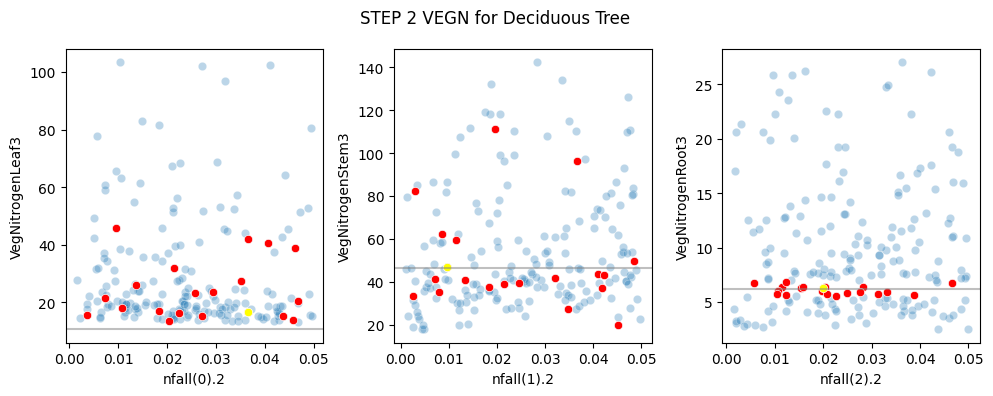

In [200]:
if STEP == 2:
    fig, axes = plt.subplots(1,3, figsize = (10,4))
    fig.suptitle('STEP 2 VEGN for Deciduous Tree')

    axes[0].axhline(targets['VegNitrogenLeaf3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0).2', y='VegNitrogenLeaf3', ax=axes[0], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nfall(0).2', y='VegNitrogenLeaf3', ax=axes[0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(0).2', y='VegNitrogenLeaf3', ax=axes[0], color='yellow',legend=False)

    axes[1].axhline(targets['VegNitrogenStem3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(1).2', y='VegNitrogenStem3', ax=axes[1], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nfall(1).2', y='VegNitrogenStem3', ax=axes[1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(1).2', y='VegNitrogenStem3', ax=axes[1], color='yellow',legend=False)

    
    axes[2].axhline(targets['VegNitrogenRoot3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(2).2', y='VegNitrogenRoot3', ax=axes[2], alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nfall(2).2', y='VegNitrogenRoot3', ax=axes[2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(2).2', y='VegNitrogenRoot3', ax=axes[2], color='yellow',legend=False)


    fig.tight_layout()

ValueError: Could not interpret value `krb(0).1` for parameter `x`

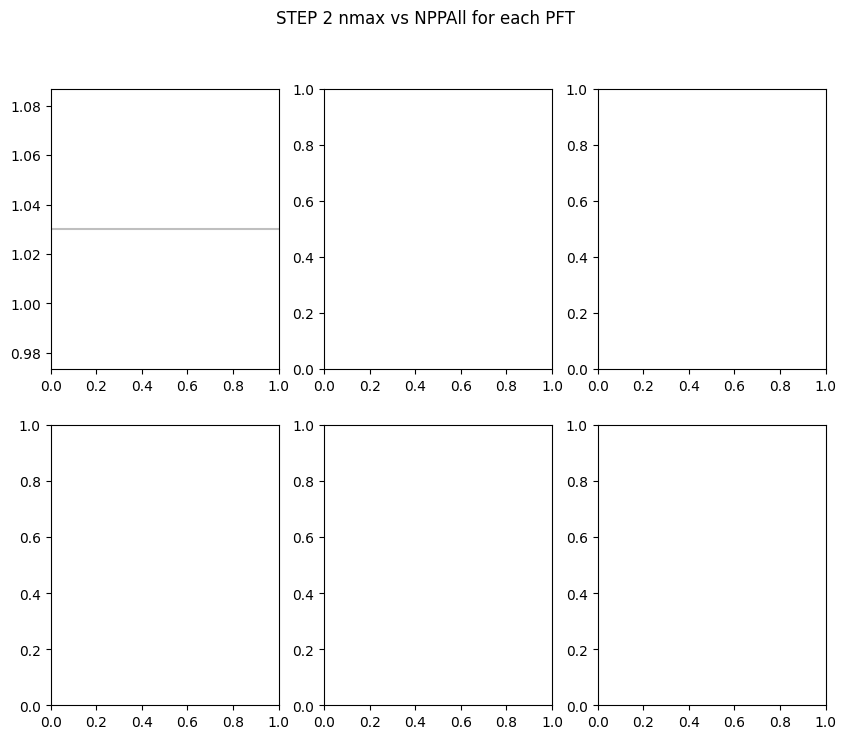

In [106]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], hue='krb(0).1', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Moss')


    fig.tight_layout()

In [19]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Shrub')

    axes[0,1].axhline(targets['VegCarbonStem3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Shrub')
    
    axes[0,2].axhline(targets['VegCarbonRoot3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrub')


    fig.tight_layout()

In [20]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Sedge')


    
    axes[0,2].axhline(targets['VegCarbonRoot4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Sedge')


    fig.tight_layout()

In [21]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], hue='krb(0).1', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Lichen')


    fig.tight_layout()

In [22]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 krb(0) vs NPPAll for each PFT')

    axes[0,0].axhline(targets['NPPAll1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='NPPAll1', ax=axes[0,0], hue='krb(2)', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='NPPAll1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='NPPAll1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')
    axes[0,0].set_xlim(-8,0)

    axes[0,1].axhline(targets['NPPAll2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).1', y='NPPAll2', ax=axes[0,1], hue='krb(2)', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss (Sphagnum dominant)')
    axes[0,1].set_xlim(-5,0)
    
    axes[0,2].axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='NPPAll3', ax=axes[0,2], hue='krb(2).1', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='NPPAll3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='NPPAll3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrubs (Evergreen Dominant)')
    axes[0,2].set_xlim(-5,0)

    axes[1,0].axhline(targets['NPPAll4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='NPPAll4', ax=axes[1,0], hue='krb(2).2', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='NPPAll4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='NPPAll4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('Tussock Cottongrass')
    axes[1,0].set_xlim(-5,0)

    axes[1,1].axhline(targets['NPPAll5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).4', y='NPPAll5', ax=axes[1,1], hue='krb(2)', legend=True, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='red',label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='yellow',label='Top run')
    axes[1,1].title.set_text('Reindeer Lichen')
    axes[1,1].set_xlim(-5,0)

    axes[1,1].legend(loc='lower right', bbox_to_anchor=(0,-.5), title='krb(2)')

    fig.tight_layout()

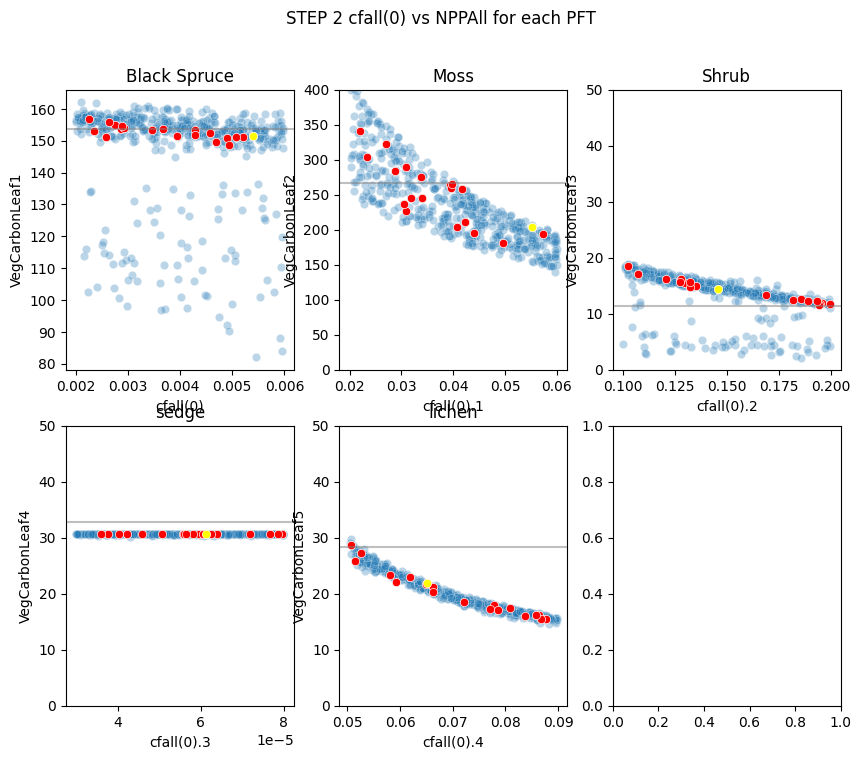

In [183]:
if STEP == 3:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 cfall(0) vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')
    
    axes[0,1].axhline(targets['VegCarbonLeaf2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss')
    axes[0,1].set_ylim(0, 400)
    
    axes[0,2].axhline(targets['VegCarbonLeaf3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrub')
    axes[0,2].set_ylim(0, 50)
    
    axes[1,0].axhline(targets['VegCarbonLeaf4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('sedge')
    axes[1,0].set_ylim(0, 50)
    
    axes[1,1].axhline(targets['VegCarbonLeaf5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], color='yellow',legend=False)
    axes[1,1].title.set_text('lichen')
    axes[1,1].set_ylim(0, 50)

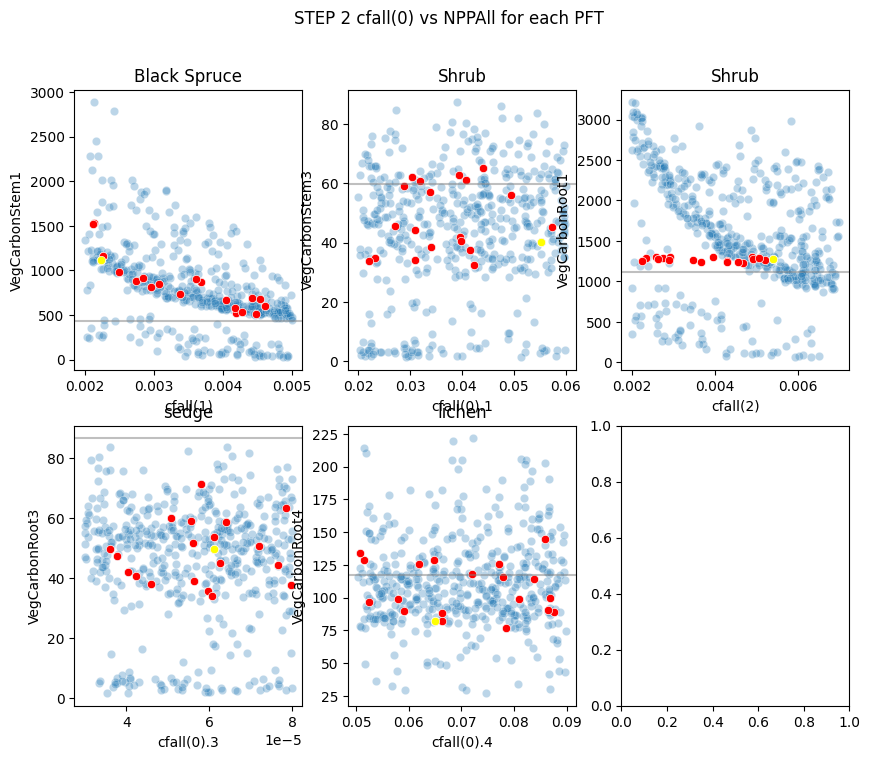

In [205]:
if STEP == 3:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 cfall(0) vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonStem1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1)', y='VegCarbonStem1', ax=axes[0,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(1)', y='VegCarbonStem1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1)', y='VegCarbonStem1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')
    
    axes[0,1].axhline(targets['VegCarbonStem3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).1', y='VegCarbonStem3', ax=axes[0,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).1', y='VegCarbonStem3', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).1', y='VegCarbonStem3', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Shrub')

    
    axes[0,2].axhline(targets['VegCarbonRoot1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2)', y='VegCarbonRoot1', ax=axes[0,2], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0)', y='VegCarbonRoot1', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y='VegCarbonRoot1', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrub')

    
    axes[1,0].axhline(targets['VegCarbonRoot3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).3', y='VegCarbonRoot3', ax=axes[1,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).3', y='VegCarbonRoot3', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).3', y='VegCarbonRoot3', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('sedge')

    
    axes[1,1].axhline(targets['VegCarbonRoot4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).4', y='VegCarbonRoot4', ax=axes[1,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).4', y='VegCarbonRoot4', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).4', y='VegCarbonRoot4', ax=axes[1,1], color='yellow',legend=False)
    axes[1,1].title.set_text('lichen')


In [184]:
results.sort_values(by='mean_rmse')[-15:].index

Int64Index([477, 209, 429, 414, 188, 373, 85, 233, 62, 26, 407, 236, 446, 420,
            126],
           dtype='int64')

In [273]:
results.iloc[results['rmse'].idxmin()]

CarbonShallow           4.657250e+03
CarbonDeep              6.637357e+04
CarbonMineralSum        4.490167e+04
OrganicNitrogenSum      3.299904e+03
AvailableNitrogenSum    6.156386e+00
micbnup                 4.087075e-02
kdcrawc                 3.579677e-01
kdcsoma                 3.345949e-02
kdcsompr                1.466908e-03
kdcsomcr                8.261177e-08
r2                               NaN
rmse                    2.559769e-03
rmse_scaled             0.000000e+00
overall_accuracy                 NaN
mean_rmse               1.279884e-03
mean_r2                          NaN
Name: 112, dtype: float64

In [274]:
def spaghetti_match_plot(df_x,df_y,logy=False):
    ''' plots the spaghetti plot of modeled v.s. observed values 
        df_x: parameter dataframe
        df_y: model output dataframe
        logy: True enables the logplot option
    '''
    fig, ax=plt.subplots()
    #ax = df_y.transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5))
    
    nrange=range(len(df_y.columns))
    df_x.plot(logy=logy,legend=True,style="o",color='red',xticks=nrange, rot=90, label="Targets", ax=ax);
    
    top=results.sort_values(by='rmse', ascending=False)[:10].index
    results[target_vars].iloc[results['rmse'].idxmin()].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    #results[target_vars].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    #results[target_vars].iloc[41].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    results[target_vars].iloc[top].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='red',ax=ax)
    
    df_x.plot(logy=logy,legend=False,style="o",color='red',xticks=nrange, rot=90,ax=ax)
    ax.set_xticklabels(df_y.columns,fontsize=12)
    #plt.ylim(10e-5, 2000)
    
target_df=pd.DataFrame(targets).reset_index()
target_df.columns=['variable', 'value']

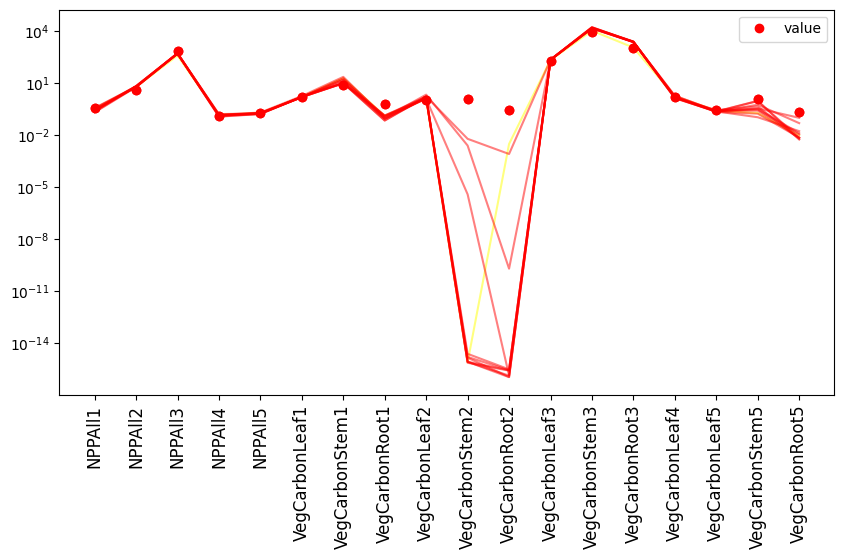

In [275]:
if STEP==2:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)

In [260]:
if STEP==3:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)

In [286]:
for val in results[calib_params_flat].iloc[results['overall_accuracy'].idxmax()].values:
    print(f'- {val}')

- -8.166117506115512
- -0.2013616481514351
- -19.88793280066932
- -5.2358285492600585
- -1.57792701348386
- -6.256905165717025
- -5.08363298004539
- -16.61485688866246
- -8.883415731422975
- -3.5611304640625794
- -5.69478036504069
- -14.411997440550556
- -18.1716068007346
- 0.013055357848038
- 0.2571708376920737
- 0.0169359946986383
- 0.0072445926276296
- 0.0574144136430919
- 0.0002499509956687
- 0.052693023583984
- 0.0046234710684923
- 0.0012091783592155
- 0.0027026058147147
- 0.0018919105812871
- 0.0055620429583335
- 0.0027420970101807


In [287]:
corr = results[target_vars + calib_params_flat].corr()

corr= corr.drop(columns=calib_params_flat)
corr = corr.loc[calib_params_flat]


<AxesSubplot:>

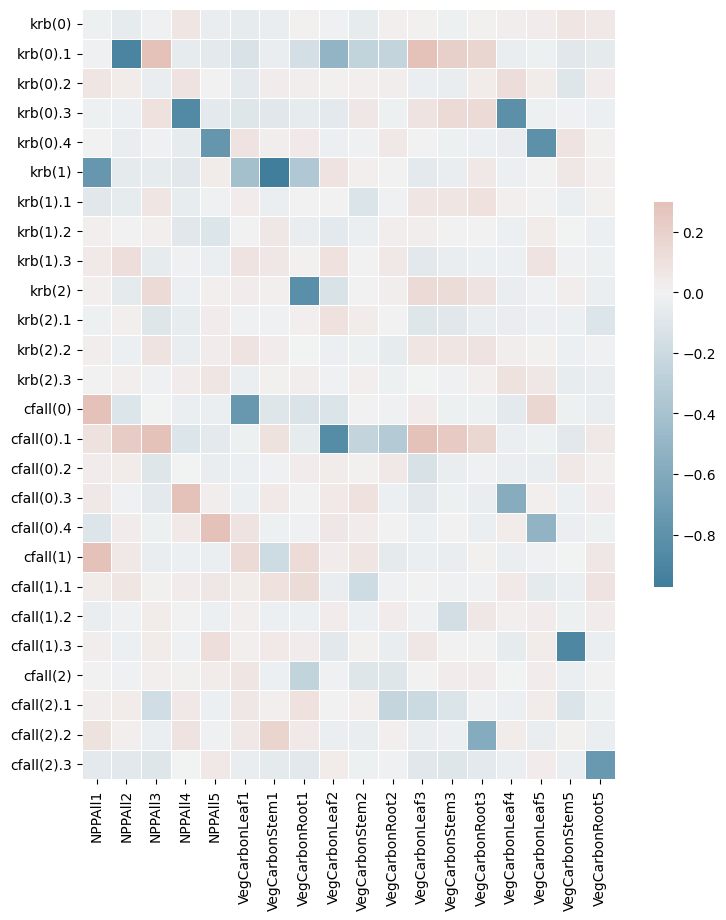

In [288]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,annot=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


minmax=results[calib_params_flat].iloc[top].apply(minMax)

In [28]:
for column in minmax.columns:
    print('- Uniform({}, {})'.format(minmax[column]['min'], minmax[column]['max']))

- Uniform(1.4407818395790244, 1.4407818395790244)
- Uniform(0.4024449290026228, 0.4024449290026228)
- Uniform(0.0113407825557282, 0.0113407825557282)
- Uniform(0.0026550632203939, 0.0026550632203939)
- Uniform(3.835961767650723e-07, 3.835961767650723e-07)


In [29]:
targets

CarbonShallow            4362.190000
CarbonDeep              22396.020000
CarbonMineralSum        45220.400000
OrganicNitrogenSum       2748.367000
AvailableNitrogenSum        6.153826
Name: 500, dtype: float64

In [30]:
for index, row in minmax.iterrows():
    print(row)


micbnup     1.440782e+00
kdcrawc     4.024449e-01
kdcsoma     1.134078e-02
kdcsompr    2.655063e-03
kdcsomcr    3.835962e-07
Name: min, dtype: float64
micbnup     1.440782e+00
kdcrawc     4.024449e-01
kdcsoma     1.134078e-02
kdcsompr    2.655063e-03
kdcsomcr    3.835962e-07
Name: max, dtype: float64


In [31]:
results.loc[results['kdcrawc']>results['kdcsoma']].sort_values(by='mean_rmse')[-60:]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
211,3988.386288,57961.280563,43066.289375,3780.944561,2.405886,0.191889,0.292357,0.189335,0.009768,5.599789e-08,NaN,3.747940,0.008954,NaN,1.878447,NaN
337,3472.720346,54022.940137,32733.663380,3363.703397,2.366646,0.012920,0.447748,0.009130,0.116496,3.027605e-08,NaN,3.787180,0.009048,NaN,1.898114,NaN
494,2798.829258,32401.343317,46986.404657,2822.647012,2.236686,0.021197,0.271733,0.060894,0.031446,2.574212e-10,NaN,3.917140,0.009359,NaN,1.963250,NaN
268,3650.352532,58344.414557,36522.821720,3757.432075,2.204255,0.173802,0.233084,0.011517,0.058208,1.730741e-06,NaN,3.949571,0.009436,NaN,1.979504,NaN
256,3303.377287,44528.011523,29681.774201,3616.784819,2.198342,0.145955,0.320638,0.012762,0.245636,1.146738e-10,NaN,3.955484,0.009451,NaN,1.982467,NaN
200,2863.843191,32995.214215,38769.530988,3250.036828,2.176406,0.195575,0.160024,0.111355,0.077288,3.161094e-09,NaN,3.977420,0.009503,NaN,1.993462,NaN
218,2953.283101,36781.204922,44836.558119,3841.453867,2.174739,1.253927,0.366474,0.047310,0.021991,4.088591e-08,NaN,3.979087,0.009507,NaN,1.994297,NaN
17,4116.776845,61585.874042,31713.922823,3786.446709,2.160647,0.151775,0.075908,0.035389,0.110535,2.395786e-05,NaN,3.993179,0.009541,NaN,2.001360,NaN
324,2903.461223,61929.248950,37435.255146,3322.130022,2.134436,0.062635,0.503056,0.014446,0.056393,1.850683e-07,NaN,4.019390,0.009604,NaN,2.014497,NaN
316,4102.083041,60031.752856,39925.437528,3801.229579,2.105137,0.172118,0.113033,0.030953,0.028414,2.852416e-05,NaN,4.048689,0.009674,NaN,2.029181,NaN


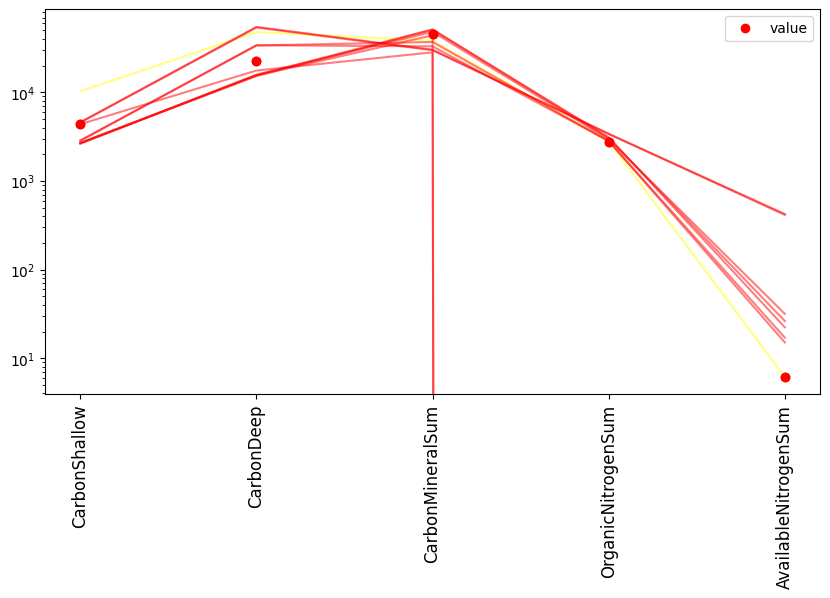

In [34]:
if STEP==4:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)


In [35]:
results.sort_values(by='CarbonDeep', ascending=False).head(100)

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
99,5245.318952,105807.495157,44664.470777,3495.453913,6.639834,0.021454,0.087804,0.143669,0.000124,4.120685e-09,NaN,0.486008,0.001144,NaN,0.243576,NaN
10,5057.640030,98026.527145,45036.153518,3503.568465,6.940673,0.014280,0.156447,0.027414,0.000131,1.112899e-09,NaN,0.786847,0.001864,NaN,0.394356,NaN
184,4935.352111,97795.272241,44732.775862,3547.322963,6.760137,0.068493,0.132038,0.155606,0.000284,4.498128e-06,NaN,0.606311,0.001432,NaN,0.303872,NaN
267,4936.994741,97420.205881,44975.670927,3542.940453,6.816844,0.039737,0.165992,0.045208,0.000162,3.838852e-10,NaN,0.663018,0.001568,NaN,0.332293,NaN
387,4849.888977,96753.961722,44810.784100,3570.982302,6.559154,0.103315,0.163236,0.125748,0.000146,1.268296e-06,NaN,0.405328,0.000951,NaN,0.203139,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,4589.873069,82330.065796,44746.494187,3659.824825,6.490065,0.076671,0.362198,0.139886,0.001584,2.255832e-08,NaN,0.336239,0.000785,NaN,0.168512,NaN
360,4512.825665,82324.680284,44950.737658,3628.835372,5.279858,1.403121,0.540374,0.312322,0.000159,5.657189e-07,NaN,0.873968,0.002073,NaN,0.438021,NaN
254,7706.284846,82247.576162,44760.032153,2888.945364,5.278950,1.873802,0.054174,0.019846,0.000355,1.474600e-05,NaN,0.874876,0.002075,NaN,0.438476,NaN
341,7718.769444,82025.355138,44693.090967,2901.993981,5.622545,0.738594,0.181776,0.005901,0.000146,5.269818e-05,NaN,0.531281,0.001252,NaN,0.266267,NaN


In [36]:
results[(results['AvailableNitrogenSum']>4) & (results['CarbonDeep']<30000)]
#203
#225

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
24,14049.769875,25223.063992,41410.148775,2899.788454,5.173320,0.983306,0.013278,0.011699,0.019370,7.260500e-06,NaN,0.980506,0.002328,NaN,0.491417,NaN
33,12210.185607,25719.932257,30170.738504,2750.992998,5.410320,0.010851,0.016619,0.022848,0.235903,6.894340e-09,NaN,0.743506,0.001760,NaN,0.372633,NaN
37,2675.211579,15718.422945,51399.430869,3112.292371,22.301596,0.022587,1.359477,0.030349,0.049813,4.926343e-07,NaN,16.147770,0.038642,NaN,8.093206,NaN
38,12550.830821,25667.441794,41281.839807,2944.753696,5.259936,0.735076,0.014025,0.152945,0.017405,3.086381e-10,NaN,0.893890,0.002120,NaN,0.448005,NaN
58,12233.718273,29075.947778,33025.070355,2722.903811,4.961296,0.015502,0.014604,0.007591,0.105651,3.894417e-05,NaN,1.192530,0.002835,NaN,0.597683,NaN
67,2368.374340,17785.771001,36210.152195,2592.012803,4.633826,0.049669,1.258814,0.147770,0.212372,2.108174e-09,NaN,1.520000,0.003619,NaN,0.761809,NaN
122,12253.718532,29193.402319,40675.555515,2800.726309,5.392295,0.118746,0.013679,0.015133,0.023507,7.588758e-10,NaN,0.761531,0.001803,NaN,0.381667,NaN
148,2627.628255,15841.365105,48212.288346,2948.574441,31.620742,0.118011,0.516923,0.103427,0.029984,1.730848e-05,NaN,25.466916,0.060954,NaN,12.763935,NaN
157,12208.181563,26838.645172,34529.350190,2868.753739,5.226961,1.277659,0.013781,0.066735,0.078012,1.965431e-07,NaN,0.926865,0.002199,NaN,0.464532,NaN
158,2447.427470,18878.789411,38264.354507,2577.514828,4.915028,0.033507,0.623328,0.113446,0.179463,1.365132e-09,NaN,1.238798,0.002946,NaN,0.620872,NaN


In [37]:
targets

CarbonShallow            4362.190000
CarbonDeep              22396.020000
CarbonMineralSum        45220.400000
OrganicNitrogenSum       2748.367000
AvailableNitrogenSum        6.153826
Name: 500, dtype: float64

In [38]:
results.iloc[[203, 225, 438, 301]]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
203,2383.595964,18124.266845,37335.983942,2527.993319,5.123681,0.011015,0.739373,0.370088,0.187866,3.734206e-07,NaN,1.030145,0.002447,NaN,0.516296,NaN
225,2419.670814,18819.221664,50774.950030,2851.829235,4.079829,0.056281,0.868126,0.556908,0.030287,1.003142e-10,NaN,2.073997,0.004946,NaN,1.039471,NaN
438,3607.330884,28100.525702,33129.338975,3662.936106,1.835952,2.284383,1.046668,0.011905,0.235779,3.741515e-06,NaN,4.317874,0.010318,NaN,2.164096,NaN
301,2355.215496,17661.991150,34663.538702,3592.513184,1.752973,1.774089,1.478971,0.584966,0.155811,2.649804e-10,NaN,4.400853,0.010517,NaN,2.205685,NaN


In [39]:
print(results.iloc[[144,63,400,495]]['micbnup'].min())
print(results.iloc[[144,63,400,495]]['micbnup'].max())


0.0131632338106962
1.391369618505347


In [40]:
print(results.iloc[[144,63,400,495]]['kdcrawc'].min())
print(results.iloc[[144,63,400,495]]['kdcrawc'].max())

0.0140073185872174
0.2275708623199219


In [41]:
print(results.iloc[[144,63,400,495]]['kdcsoma'].min())
print(results.iloc[[144,63,400,495]]['kdcsoma'].max())

0.0418437562796824
0.2373394743615009


In [42]:
print(results.iloc[[144,63,400,495]]['kdcsompr'].min())
print(results.iloc[[144,63,400,495]]['kdcsompr'].max())

0.0002623680129089
0.1320260870872875


In [43]:
print(results.iloc[[144,63,400,495]]['kdcsomcr'].min())
print(results.iloc[[144,63,400,495]]['kdcsomcr'].max())

1.0871319489523084e-10
2.423170146988913e-05


(0.0, 30.0)

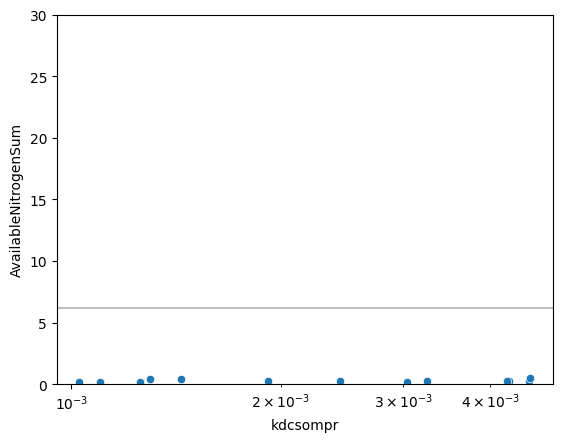

In [84]:
sns.scatterplot(data=results, x='kdcsompr', y='AvailableNitrogenSum')
plt.axhline(targets['AvailableNitrogenSum'], color='grey', alpha=0.5)
plt.xscale('log')
plt.ylim(0,30)

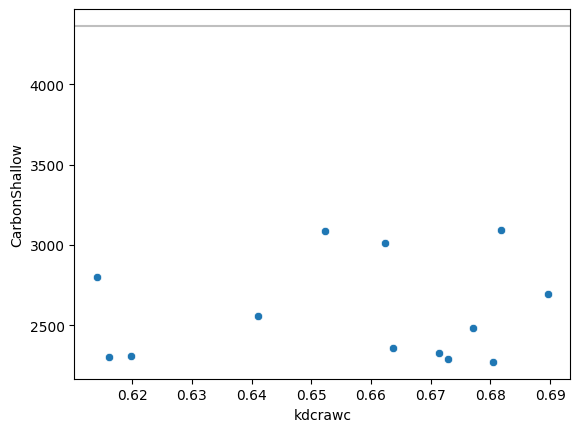

In [85]:
sns.scatterplot(data=results, x='kdcrawc', y='CarbonShallow')
plt.axhline(targets['CarbonShallow'], color='grey', alpha=0.5)

In [46]:
results[(results['CarbonShallow']<6000)& (results['CarbonShallow']>3000)]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
0,4286.446601,63330.902155,43774.894113,3789.721044,5.402328,1.121669,0.290980,0.021404,0.008782,3.942718e-07,NaN,0.751498,0.001779,NaN,0.376638,NaN
2,4640.261881,63137.783705,37504.771706,3813.274638,6.316254,0.263452,0.035078,0.788864,0.038281,5.359289e-09,NaN,0.162428,0.000369,NaN,0.081398,NaN
4,4769.097108,95613.642642,44706.649110,3599.280514,6.780576,0.031376,0.175457,0.475195,0.000321,9.493696e-08,NaN,0.626750,0.001481,NaN,0.314115,NaN
5,4503.295547,84685.337173,45047.215623,3676.498670,6.469552,0.018649,0.649105,0.117848,0.000815,5.173160e-09,NaN,0.315726,0.000736,NaN,0.158231,NaN
6,4423.470796,72913.350806,44847.258014,3643.420797,5.280303,1.304270,0.936975,0.698911,0.001686,2.556524e-06,NaN,0.873523,0.002072,NaN,0.437797,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,4564.241540,63111.339168,43133.692885,3802.545853,5.312618,1.370456,0.083410,0.415023,0.008243,4.154127e-06,NaN,0.841208,0.001994,NaN,0.421601,NaN
491,4238.109670,54939.306696,41157.125219,3687.260725,1.878979,0.958751,0.209196,0.014599,0.022983,2.762992e-07,NaN,4.274847,0.010215,NaN,2.142531,NaN
493,4278.444067,60993.338483,37994.814186,3714.576767,2.845708,0.096009,0.834263,0.006487,0.050768,7.776557e-07,NaN,3.308118,0.007901,NaN,1.658009,NaN
496,4294.769663,71820.290887,44694.036618,3769.884223,6.614378,0.024524,0.755022,0.027292,0.004558,5.203386e-10,NaN,0.460552,0.001083,NaN,0.230818,NaN


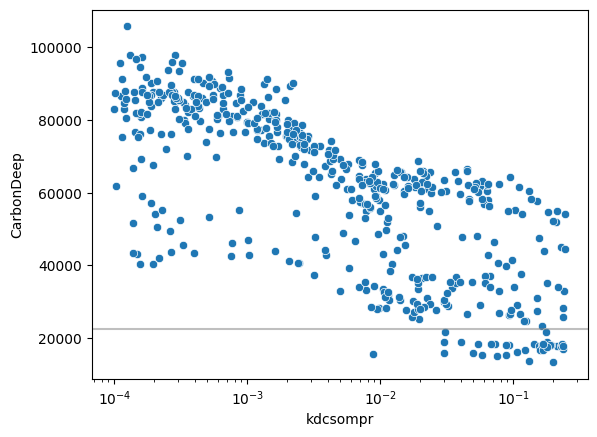

In [47]:
sns.scatterplot(data=results, x='kdcsompr', y='CarbonDeep')
plt.axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
plt.xscale('log')

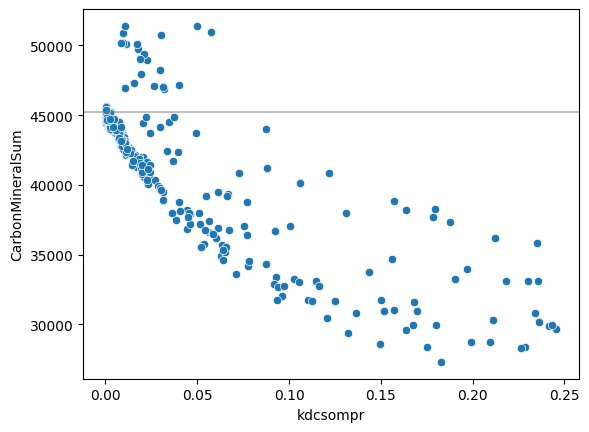

In [298]:
sns.scatterplot(data=results, x='kdcsompr', y='CarbonMineralSum')
plt.axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)

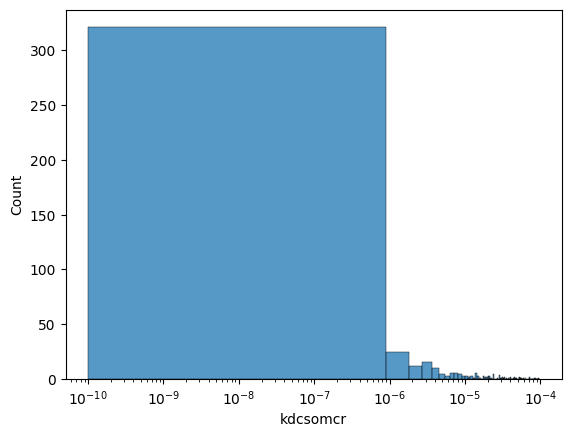

In [46]:
sns.histplot(data=results, x='kdcsomcr')
plt.xscale("log")

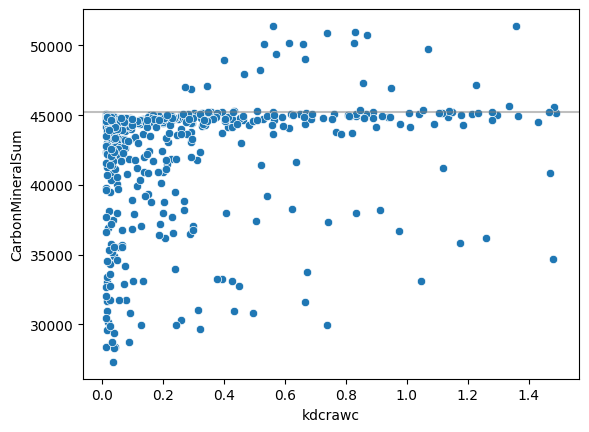

In [299]:
sns.scatterplot(data=results, x='kdcrawc', y='CarbonMineralSum')
plt.axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)

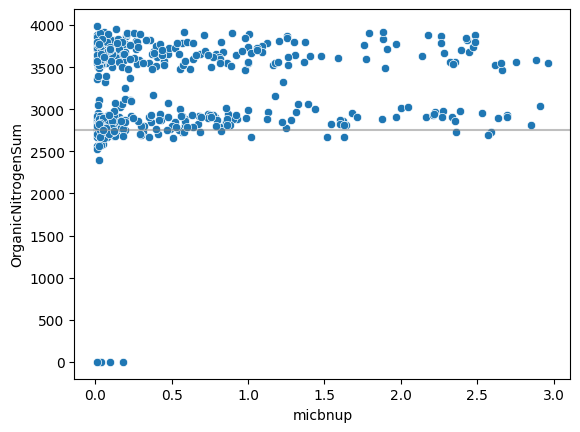

In [300]:
sns.scatterplot(data=results, x='micbnup', y='OrganicNitrogenSum')
plt.axhline(targets['OrganicNitrogenSum'], color='grey', alpha=0.5)

In [49]:
pd.melt(pd.DataFrame(targets))

,variable,value
0,500,4362.190000
1,500,22396.020000
2,500,45220.400000
3,500,2748.367000
4,500,6.153826


In [50]:
pd.DataFrame(targets)

,500
CarbonShallow,4362.190000
CarbonDeep,22396.020000
CarbonMineralSum,45220.400000
OrganicNitrogenSum,2748.367000
AvailableNitrogenSum,6.153826


In [51]:
targets.index

Index(['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum',
       'AvailableNitrogenSum'],
      dtype='object')

In [52]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import loguniform

In [53]:
from scipy.stats import loguniform

def generate_loguniform_sample(a, b, size=10):
    """
    Generate a random sample of size 'size' from a log uniform distribution for elements within the interval (a, b).
    
    Parameters:
        a (float): Lower bound of the interval.
        b (float): Upper bound of the interval.
        size (int): Number of elements in the sample (default is 10).
    
    Returns:
        numpy.ndarray: An array of size 'size' containing random samples from the log uniform distribution.
    """
    min_val = a
    max_val = b
    spread=b-a
    loguniform_samples = loguniform.rvs(min_val,max_val,size=size)
    return loguniform_samples

# Example usage:
a = 1e-15
b = 1e-12
sample = generate_loguniform_sample(a, b, size=500)
print("Generated Sample:", sample)

Generated Sample: [8.84522830e-13 2.35451477e-13 6.26490252e-15 1.02499831e-15
 1.12211589e-15 2.58574768e-14 5.75747075e-15 5.93058191e-13
 1.22247079e-13 1.77337524e-13 6.40367993e-15 1.42866611e-15
 3.33663397e-15 4.57539191e-14 1.77692654e-15 9.12509668e-13
 2.23072660e-13 1.16557522e-15 1.07647521e-13 3.62697410e-15
 1.48359879e-15 7.33742853e-13 2.83760136e-13 3.58919326e-14
 3.18952807e-15 2.10550856e-15 1.18419893e-14 7.05439957e-15
 1.77048606e-15 5.54863391e-15 2.57970647e-13 8.92684977e-15
 2.86691778e-13 1.65716086e-14 1.57906180e-15 3.21259524e-14
 5.22265652e-13 2.43168976e-13 4.82355918e-15 7.13856048e-14
 5.30194334e-15 6.12736360e-15 1.36221349e-14 1.12055999e-13
 2.25160481e-15 1.19922227e-13 5.71489187e-15 1.09875693e-14
 2.19315288e-13 3.42660652e-13 2.48119599e-15 8.58283994e-14
 1.35990249e-13 1.13607066e-14 7.16064515e-15 1.87988472e-14
 7.66118173e-14 2.35985309e-13 1.14567468e-13 7.05780014e-14
 1.75912854e-14 5.05925082e-13 7.01854205e-13 3.30899583e-15
 2.157